# Machine Learning Project

### T2 - Sentiment Analysis: Twitter
The purpose of this project is to develop a machine learning model to classify tweets as either positive or negative. We will try different models to show which ones perform best.

## Import libraries and models
We import the libraries and modules that we will need for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
import os
import json
os.environ['TF_USE_LEGACY_KERAS']='1'
import shutil
import string
import nltk
import warnings
import zipfile
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
import requests
from bs4 import BeautifulSoup
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import keras_tuner as kt
from tensorflow.keras.layers import Bidirectional
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Model, Input
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

2025-02-20 10:12:49.775917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740042769.419972     770 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740042769.451105     770 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 10:12:49.888314: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/matteo/anaconda3/envs/MLenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please upda

## Choose a BERT model to fine-tune
We chose the Bert model with 4 trasnformers layers, hidden size 512 and 8 attention head.

In [2]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

#these are dictionary that act like lookup tables
tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

In [3]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

I0000 00:00:1740042776.806898     770 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


## Load the dataset
Here we extract all the content from the TwitterParsed.zip archive, then we load all the tweets (both positive and negative) and save them in a single file called 'sentiment_data.csv'. In this way, we can manage the data more effectively.

In [4]:
# 1. Zip file path
zip_path = 'TwitterParsed.zip'
extract_path = 'estrazione'

# Extract all the content from the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 2. Setting folder paths
positive_path = os.path.join(extract_path, 'TwitterParsed/1')
negative_path = os.path.join(extract_path, 'TwitterParsed/0')

# Reading tweets and building DataFrame
def load_data_from_folder(folder_path, sentiment_label):
    data = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read().strip()  # Read and remove blank spaces
            data.append({'text': text, 'sentiment': sentiment_label})
    return pd.DataFrame(data)

# 3. Load positive and negative data
positive_data = load_data_from_folder(positive_path, 1)  # Label 1 for positives
negative_data = load_data_from_folder(negative_path, 0)  # Label 0 for negatives

# Join the two DataFrames
data = pd.concat([positive_data, negative_data], ignore_index=True)

# 4. Save the final DataFrame in a single CSV file
csv_path = 'sentiment_data.csv'
data.to_csv(csv_path, index=False, encoding='utf-8')

print(f'Pre-processed data saved in {csv_path}')


Pre-processed data saved in sentiment_data.csv


With the pd.read_csv() function from pandas, we read the CSV file and load it into a DataFrame, which is a tabular data structure similar to a spreadsheet or a database table.

In [5]:
df = pd.read_csv('sentiment_data.csv')
df.head()


,text,sentiment
0,Taking down the tent in the noonday sun. Burni...,1
1,@dlayphoto Thx for the #twittertees nomination...,1
2,went mk at 8:30 to get wrist band :O came home...,1
3,watching a marathon series of the hills !,1
4,Best day at park for Mother's day -- love my M...,1


## First Cleaning
Here we proceed with an initial data processing by removing all user tags "@", links (http/s,www), and citations (&quot) using the str.replace function, which replaces the specified expression with "".

In [6]:
#remove user tags "@"
df['clean_tweet'] = df['text'].str.replace(r"@[\w]+", "", regex=True)

#remove links "http/s, www"
df['clean_tweet'] = df['clean_tweet'].str.replace("http\S+|https\S+|www.\S+", "", case=False, regex=True)

#remove quotations "&quot"
df['clean_tweet'] = df['clean_tweet'].str.replace("&quot", "", case=False)

df.head()

,text,sentiment,clean_tweet
0,Taking down the tent in the noonday sun. Burni...,1,Taking down the tent in the noonday sun. Burni...
1,@dlayphoto Thx for the #twittertees nomination...,1,Thx for the #twittertees nomination. doubt it...
2,went mk at 8:30 to get wrist band :O came home...,1,went mk at 8:30 to get wrist band :O came home...
3,watching a marathon series of the hills !,1,watching a marathon series of the hills !
4,Best day at park for Mother's day -- love my M...,1,Best day at park for Mother's day -- love my M...


Now we remove all the special characters, the numbers and the punctuation.

In [7]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z]", " ", regex=True)
df.head()

,text,sentiment,clean_tweet
0,Taking down the tent in the noonday sun. Burni...,1,Taking down the tent in the noonday sun Burni...
1,@dlayphoto Thx for the #twittertees nomination...,1,Thx for the twittertees nomination doubt it...
2,went mk at 8:30 to get wrist band :O came home...,1,went mk at to get wrist band O came home...
3,watching a marathon series of the hills !,1,watching a marathon series of the hills
4,Best day at park for Mother's day -- love my M...,1,Best day at park for Mother s day love my M...


Now we convert all uppercase letters to lowercase.




In [8]:
df['clean_tweet'] = df['clean_tweet'].str.lower()
df.head()

,text,sentiment,clean_tweet
0,Taking down the tent in the noonday sun. Burni...,1,taking down the tent in the noonday sun burni...
1,@dlayphoto Thx for the #twittertees nomination...,1,thx for the twittertees nomination doubt it...
2,went mk at 8:30 to get wrist band :O came home...,1,went mk at to get wrist band o came home...
3,watching a marathon series of the hills !,1,watching a marathon series of the hills
4,Best day at park for Mother's day -- love my M...,1,best day at park for mother s day love my m...


In this phase, we remove all the stop-words and replace each word with its root word using spaCy a library for advanced Natural Language Processing.

In [9]:
#spacy.cli.download("en_core_web_sm")

nlp = spacy.load("en_core_web_sm")

#apply lemmatization, remove stop words and delete words that are two letters or less
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: [token.lemma_ for token in nlp(x) if not token.is_stop and len(token.lemma_) > 2])

df['clean_tweet'].head()

0     [take, tent, noonday, sun, burn, get, beer, day]
1     [thx, twittertee, nomination, doubt, win, split]
2    [     , wrist, band, come, home, english, brea...
3                      [watch, marathon, series, hill]
4    [good, day, park, mother, day,    , love, mum,...
Name: clean_tweet, dtype: object

Now we reassemble all the tokens to form complete sentences.

In [10]:
for i in range(len(df['clean_tweet'])):
    df['clean_tweet'][i] = ' '.join(df['clean_tweet'][i])


df['clean_tweet'].head()

0              take tent noonday sun burn get beer day
1            thx twittertee nomination doubt win split
2          wrist band come home english breakfast s...
3                           watch marathon series hill
4    good day park mother day     love mum bit mass...
Name: clean_tweet, dtype: object

In [11]:
#we create a new column with half tweets 
df['half_tweet'] = df['clean_tweet'].apply(lambda text: text[:len(text)//2])
df['half_tweet'].head()

0                               take tent noonday s
1                              thx twittertee nomin
2                              wrist band come home
3                                     watch maratho
4    good day park mother day     love mum bit mass
Name: half_tweet, dtype: object

In [12]:
#we calculate the maximum length of a tweet
max_length = df['clean_tweet'].str.split().str.len().max()
print(max_length)

23


We checked that the dataset doesn't contain empty or duplicated tweets.

## Plotting
Now we plot the most frequent words in positive and negative tweets using the WordCloud library (larger = more frequent).

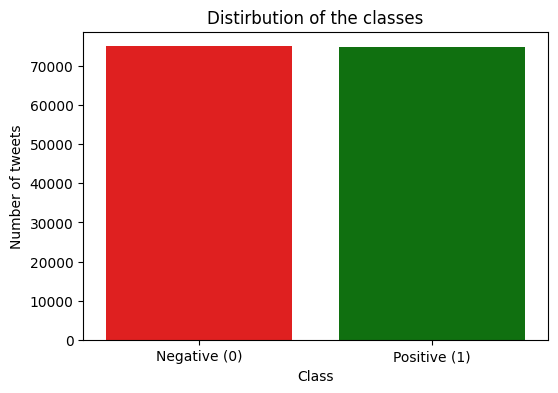

In [13]:
#plotting the distribution of the classes
class_counts = df["sentiment"].value_counts()

#bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["red", "green"])
plt.xticks([0, 1], ["Negative (0)", "Positive (1)"])
plt.xlabel("Class")
plt.ylabel("Number of tweets")
plt.title("Distirbution of the classes")
plt.show()

Since the dataset is balanced, there is no need to use dataset balancing techniques.

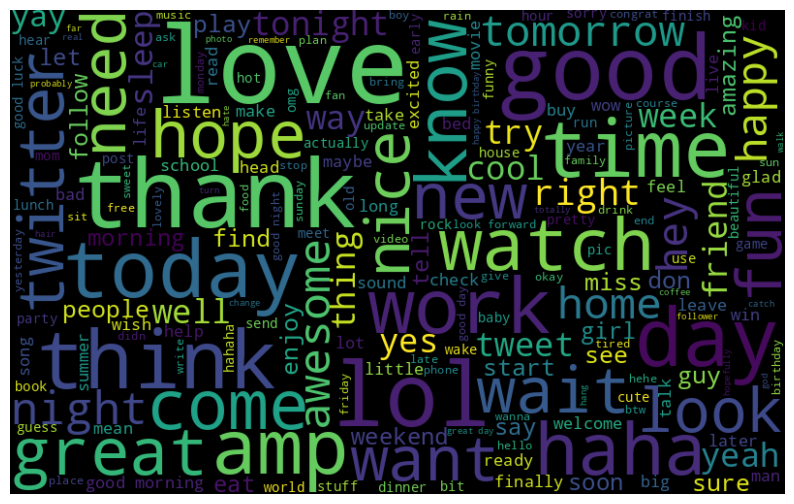

In [14]:
#plotting the most frequent words in the positive tweets using WordCloud
all_words = ' '.join([text for text in df['clean_tweet'][df['sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

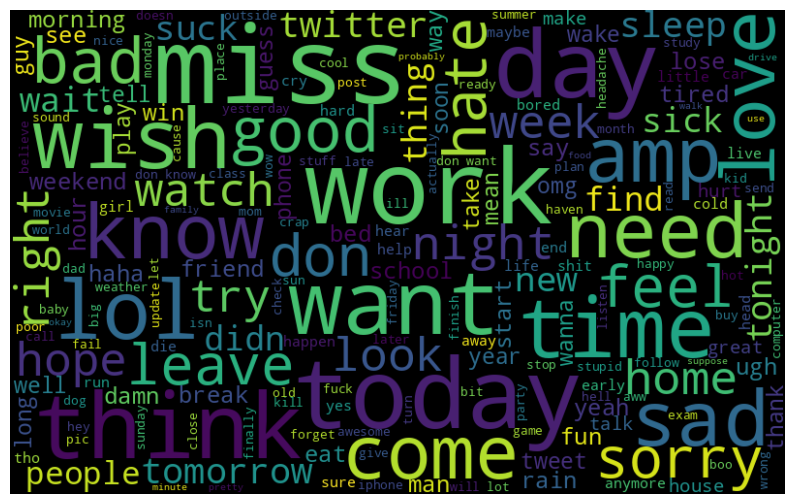

In [15]:
#plotting the most frequent words in the negative tweets using WordCloud
all_words = ' '.join([text for text in df['clean_tweet'][df['sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Split the dataset: training set, validation set and test set
Now we randomly split the dataset. As we know the training set is used for training the models, the validation set is used for calculate the performance of the results and also the test set is used evaluate, at the end, the performance but on new data.
'random_state' as the name suggests, is used fot initializing the internal random number generator, wich will decide the splitting of data into training set, validation set and test set. In the documentation is stated that:
*If random_state is an integer, then it is used to seed a new RandomState object.*
Before of all that we need to separate the data and the label.


In [16]:
#separating the data and the label
x = df['clean_tweet']
y = df['sentiment']
x_2 = df['half_tweet']

In [17]:
#split for test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#slipt for test set n.2
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y, test_size=0.20, random_state=42)

#split for validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

#split for validation set n.2
x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(x_train_2, y_train_2, test_size=0.15, random_state=42)

## Define the models
We define two models, Transformers and RNN, to compare them and see which one performs best in the sentiment analysis task

In [18]:
#Define loss function and metrics
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

### Transformers

Now, we are going to build a model that includes:

* Input Layer
* Preprocessing Layer
* Encoder Layer with BERT
* Dropout Layer to improve performance (using keras-tuner to optimize hyperparameters)
* Final Output Layer, a fully connected dense layer responsible for the classification task

In [19]:
def build_TF_model(hp):
    
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    
    #setting dropout rate
    net = tf.keras.layers.Dropout(hp.Float('dropout_rate',0.1,0.5,step=0.1))(net)
        
    #setting AdamW
    optimizer=tf.keras.optimizers.AdamW(learning_rate=hp.Choice('learning_rate',[1e-5,2e-5,3e-5]), weight_decay=1e-4)
    
    net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
    model = tf.keras.Model(text_input, net)
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
       
    return model  
    

#### Define Transformers Tuners
Now we define tuners to calculate the optimal learning rate and dropout rate

##### Define TF tuner object for the entire Tweet with Hyperband

In [20]:
TF_tuner = kt.Hyperband(
    hypermodel=build_TF_model,
    objective='val_binary_accuracy',
    max_epochs=20,
    factor=3,
    directory='tuner_results',
    project_name='bert_tuning',
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values)).batch(32)


TF_tuner.search_space_summary()

# Define hyperparameters using the instance
TF_tuner.search(train_dataset,
            epochs=20,
            validation_data=val_dataset,
            callbacks=[early_stopping])



Search space summary
Default search space size: 2
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 1e-05, 'conditions': [], 'values': [1e-05, 2e-05, 3e-05], 'ordered': True}


In [21]:
best_TF_hps=TF_tuner.get_best_hyperparameters(num_trials=1)[0]

#print results
print(f"""
Best hyperparameters found:
-learning_rate: {best_TF_hps.get('learning_rate')}
-dropout_rate: {best_TF_hps.get('dropout_rate')}
""")


Best hyperparameters found:
-learning_rate: 2e-05
-dropout_rate: 0.1



##### Define TF tuner object for half Tweet with Hyperband

In [22]:
TF_tuner_2 = kt.Hyperband(
    hypermodel=build_TF_model,
    objective='val_binary_accuracy',
    max_epochs=20,
    factor=3,
    directory='tuner_results',
    project_name='bert_tuning_2',
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

train_dataset_2 = tf.data.Dataset.from_tensor_slices((x_train_2.values, y_train_2.values)).batch(32)
val_dataset_2 = tf.data.Dataset.from_tensor_slices((x_val_2.values, y_val_2.values)).batch(32)


TF_tuner_2.search_space_summary()

# Define hyperparameters using the instance
TF_tuner_2.search(train_dataset_2,
            epochs=20,
            validation_data=val_dataset_2,
            callbacks=[early_stopping])


Search space summary
Default search space size: 2
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 1e-05, 'conditions': [], 'values': [1e-05, 2e-05, 3e-05], 'ordered': True}


In [23]:
best_TF_hps_2=TF_tuner_2.get_best_hyperparameters(num_trials=1)[0]

#print results
print(f"""
Best hyperparameters found:
-learning_rate: {best_TF_hps_2.get('learning_rate')}
-dropout_rate: {best_TF_hps_2.get('dropout_rate')}
""")


Best hyperparameters found:
-learning_rate: 1e-05
-dropout_rate: 0.1



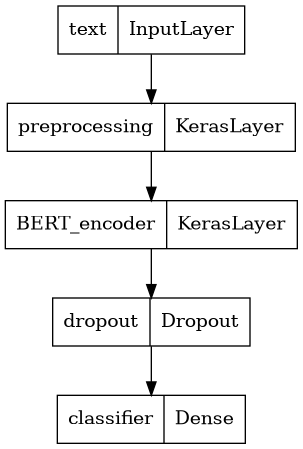

In [24]:
#plot the transformer model
TF_model = build_TF_model(best_TF_hps)

tf.keras.utils.plot_model(TF_model)


### RNN

Now, we are going to build a model that includes:

* Input Layer
* Embedding Layer
* LSTM Layer 
* Bidirectional LSTM Layer
* Final Output Layer, a fully connected dense layer responsible for the classification task

In [25]:
def build_RNN_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(20000, 128))

    num_layers = hp.Int('num_layers', 1, 3, 1)
    for i in range(num_layers):

        units = hp.Int(f'units_layer_{i+1}', min_value=32, max_value=256, step=32)

        #if we are in the last layer we don't return sequences
        return_sequences = i<num_layers-1 or hp.Boolean('use_bidirectional')
        model.add(tf.keras.layers.LSTM(units=units, return_sequences=return_sequences))


        #Dropout
        if hp.Boolean(f'dropout_layer_{i+1}'):
          model.add(tf.keras.layers.Dropout(rate=hp.Float(f'dropout_rate_{i+1}', min_value=0.1, max_value=0.5, step=0.1)))


    #add bidirectional layer
    if hp.Boolean('use_bidirectional'):
        units = hp.Int('bidirectional_units', min_value=32, max_value=256, step=32)
        model.add(Bidirectional(tf.keras.layers.LSTM(units=units, return_sequences=False)))

    #output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))
    
    #using AdamW
    optimizer=tf.keras.optimizers.AdamW(learning_rate=hp.Choice('learning_rate',[1e-5,2e-5,3e-5]), weight_decay=1e-4)

    #compile the model
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)



    return model



#### Define RNN Tuners
Now we define tuners to calculate the optimal learning rate, number of layers and layer units

##### Define RNN tuner object for the entire Tweet with Hyperband

In [26]:
#word tokenization and vectorization

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # Initialize tokenizer
tokenizer.fit_on_texts(x_train) # Fit on training data
x_train_seq = tokenizer.texts_to_sequences(x_train) # Convert text to sequences
x_val_seq = tokenizer.texts_to_sequences(x_val) # Convert text to sequences

# Pad the sequences to have the same length
x_train_padded = pad_sequences(x_train_seq, padding='post', maxlen=max_length) # Pad training data
x_val_padded = pad_sequences(x_val_seq, padding='post', maxlen=max_length) # Pad validation data

In [27]:
#define RNN tuner object with Hyperband
RNN_tuner = kt.Hyperband(
    build_RNN_model,
    objective='val_binary_accuracy',
    max_epochs=20,
    factor=3,
    directory='tuner_results',
    project_name='rnn_tuning')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


#start search
RNN_tuner.search(x_train_padded, y_train, epochs=20, validation_data=(x_val_padded, y_val), callbacks=[early_stopping])

In [36]:
best_RNN_hps=RNN_tuner.get_best_hyperparameters(num_trials=1)[0]

print("Optimal number of layers:", best_RNN_hps.get("num_layers"))
print("Best learning rate:", best_RNN_hps.get("learning_rate"))
print("Optimal number of layer units:", best_RNN_hps.get(f"units_layer_{i+1}"))

Optimal number of layers: 1
Best learning rate: 2e-05
Optimal number of layer units: 32


##### Define RNN tuner object for half Tweet with Hyperband

In [37]:
#word tokenization and vectorization with half tweet

tokenizer_2 = Tokenizer(num_words=5000, oov_token='<OOV>') # Initialize tokenizer
tokenizer_2.fit_on_texts(x_train_2) # Fit on training data
x_train_seq_2 = tokenizer.texts_to_sequences(x_train_2) # Convert text to sequences
x_val_seq_2 = tokenizer.texts_to_sequences(x_val_2) # Convert text to sequences

# Pad the sequences to have the same length
x_train_padded_2 = pad_sequences(x_train_seq_2, padding='post', maxlen=max_length) # Pad training data
x_val_padded_2 = pad_sequences(x_val_seq_2, padding='post', maxlen=max_length) # Pad validation data

In [38]:
#define RNN tuner object for half Tweet with Hyperband
RNN_tuner_2 = kt.Hyperband(
    build_RNN_model,
    objective='val_binary_accuracy',
    max_epochs=20,
    factor=3,
    directory='tuner_results',
    project_name='rnn_tuning_2')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


#start search
RNN_tuner_2.search(x_train_padded_2, y_train, epochs=20, validation_data=(x_val_padded_2, y_val), callbacks=[early_stopping])

Trial 30 Complete [00h 19m 03s]
val_binary_accuracy: 0.6655925512313843

Best val_binary_accuracy So Far: 0.6663703322410583
Total elapsed time: 03h 27m 46s


In [39]:
best_RNN_hps_2=RNN_tuner_2.get_best_hyperparameters(num_trials=1)[0]

print("Optimal number of layers:", best_RNN_hps.get("num_layers"))
print("Best learning rate:", best_RNN_hps.get("learning_rate"))
print("Optimal number of layer units:", best_RNN_hps.get(f"units_layer_{i+1}"))

Optimal number of layers: 1
Best learning rate: 2e-05
Optimal number of layer units: 32


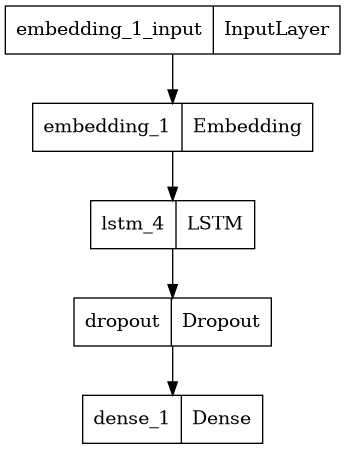

In [40]:
#plot the model
RNN_model = build_RNN_model(best_RNN_hps)

tf.keras.utils.plot_model(RNN_model)

## Training

In [41]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

### Training Transformers

#### First type of Transformer 

In [43]:
best_TF_model = TF_tuner.hypermodel.build(best_TF_hps)

print(f'Training model with {tfhub_handle_encoder}')

history_TF_1 = best_TF_model.fit(
    train_dataset,
    epochs=100,
    validation_data=val_dataset,
    callbacks=[early_stopping, lr_scheduler]
)


Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/100
3188/3188 [==============================] - 486s 149ms/step - loss: 0.5344 - binary_accuracy: 0.7199 - val_loss: 0.4994 - val_binary_accuracy: 0.7552 - lr: 2.0000e-05
Epoch 2/100
3188/3188 [==============================] - 463s 145ms/step - loss: 0.4819 - binary_accuracy: 0.7682 - val_loss: 0.5035 - val_binary_accuracy: 0.7604 - lr: 2.0000e-05
Epoch 3/100
3188/3188 [==============================] - 462s 145ms/step - loss: 0.4463 - binary_accuracy: 0.7913 - val_loss: 0.5063 - val_binary_accuracy: 0.7614 - lr: 2.0000e-05
Epoch 4/100
3188/3188 [==============================] - 462s 145ms/step - loss: 0.4085 - binary_accuracy: 0.8145 - val_loss: 0.5299 - val_binary_accuracy: 0.7602 - lr: 2.0000e-05
Epoch 5/100
3188/3188 [==============================] - 461s 145ms/step - loss: 0.3671 - binary_accuracy: 0.8355 - val_loss: 0.5690 - val_binary_accuracy: 0.7599 - lr: 2.0000e-05
Epoch 6/

In [44]:
best_TF_model.save('models/best_TF_model.tf')

In [45]:
#doing a negative sample evaluation for Transformer model
sample_text = ('i hate you')
prediction = best_TF_model.predict([sample_text])
print(prediction)

if prediction > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 1s 511ms/step
[[0.08083068]]
Negative


In [46]:
#doing a positive sample evaluation for Transformer model
sample_text = ('i love you')
prediction = best_TF_model.predict([sample_text])
print(prediction)

if prediction > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 46ms/step
[[0.9035065]]
Positive


#### Second type of Transformer 

In [47]:
best_TF_model_2 = TF_tuner.hypermodel.build(best_TF_hps_2)

print(f'Training model with {tfhub_handle_encoder}')

history_TF_2 = best_TF_model_2.fit(
    train_dataset_2,
    epochs=100,
    validation_data=val_dataset_2,
    callbacks=[early_stopping, lr_scheduler]
)


Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/100
3188/3188 [==============================] - 491s 151ms/step - loss: 0.6341 - binary_accuracy: 0.6520 - val_loss: 0.6092 - val_binary_accuracy: 0.6616 - lr: 1.0000e-05
Epoch 2/100
3188/3188 [==============================] - 471s 148ms/step - loss: 0.6016 - binary_accuracy: 0.6700 - val_loss: 0.5999 - val_binary_accuracy: 0.6699 - lr: 1.0000e-05
Epoch 3/100
3188/3188 [==============================] - 478s 150ms/step - loss: 0.5842 - binary_accuracy: 0.6860 - val_loss: 0.6016 - val_binary_accuracy: 0.6716 - lr: 1.0000e-05
Epoch 4/100
3188/3188 [==============================] - 473s 148ms/step - loss: 0.5689 - binary_accuracy: 0.6997 - val_loss: 0.6036 - val_binary_accuracy: 0.6704 - lr: 1.0000e-05
Epoch 5/100
3188/3188 [==============================] - 468s 147ms/step - loss: 0.5514 - binary_accuracy: 0.7145 - val_loss: 0.6171 - val_binary_accuracy: 0.6739 - lr: 1.0000e-05
Epoch 6/

In [48]:
#doing a negative sample evaluation for Transformer model
sample_text = ('i hate you')
prediction = best_TF_model_2.predict([sample_text])
print(prediction)

if prediction > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 1s 591ms/step
[[0.10685772]]
Negative


In [49]:
#doing a positive sample evaluation for Transformer model
sample_text = ('i love you')
prediction = best_TF_model_2.predict([sample_text])
print(prediction)

if prediction > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 46ms/step
[[0.7217848]]
Positive


In [50]:
best_TF_model.save('models/best_TF_model_2.tf')


### Training RNN

#### First type of RNN

In [52]:
best_RNN_model = RNN_tuner.hypermodel.build(best_RNN_hps)

history_RNN_1 = best_RNN_model.fit(x_train_padded, y_train, epochs=100, validation_data=(x_val_padded, y_val), callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
3188/3188 [==============================] - 46s 14ms/step - loss: 0.6845 - binary_accuracy: 0.5643 - val_loss: 0.5573 - val_binary_accuracy: 0.7228 - lr: 2.0000e-05
Epoch 2/100
3188/3188 [==============================] - 41s 13ms/step - loss: 0.5331 - binary_accuracy: 0.7420 - val_loss: 0.5262 - val_binary_accuracy: 0.7425 - lr: 2.0000e-05
Epoch 3/100
3188/3188 [==============================] - 41s 13ms/step - loss: 0.5097 - binary_accuracy: 0.7584 - val_loss: 0.5151 - val_binary_accuracy: 0.7454 - lr: 2.0000e-05
Epoch 4/100
3188/3188 [==============================] - 42s 13ms/step - loss: 0.4970 - binary_accuracy: 0.7659 - val_loss: 0.5084 - val_binary_accuracy: 0.7515 - lr: 2.0000e-05
Epoch 5/100
3188/3188 [==============================] - 41s 13ms/step - loss: 0.4902 - binary_accuracy: 0.7706 - val_loss: 0.5088 - val_binary_accuracy: 0.7513 - lr: 2.0000e-05
Epoch 6/100
3188/3188 [==============================] - 39s 12ms/step - loss: 0.4847 - binary_accuracy: 0.773

In [53]:
best_RNN_model.save('models/best_RNN_model.tf')

In [54]:
#doing a negative sample evaluation for RNN model
sample_text = ('i hate you')
sample_text_seq = tokenizer.texts_to_sequences([sample_text]) # Tokenize the sample text
sample_text_padded = pad_sequences(sample_text_seq, padding='post', maxlen=max_length) # Pad the sequence
prediction = best_RNN_model.predict(sample_text_padded) # Make predictions on the padded sequence

print(prediction)
#print the prediction converting it to 'Positive' or 'Negative'
if prediction > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 [==============================] - 0s 329ms/step
[[0.15461257]]
Negative


In [55]:
#doing a positive sample evaluation for RNN model
sample_text = ('i love you')
sample_text_seq = tokenizer.texts_to_sequences([sample_text]) # Tokenize the sample text
sample_text_padded = pad_sequences(sample_text_seq, padding='post', maxlen=max_length) # Pad the sequence
prediction = best_RNN_model.predict(sample_text_padded) # Make predictions on the padded sequence

print(prediction)
#print the prediction converting it to 'Positive' or 'Negative'
if prediction > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 [==============================] - 0s 18ms/step
[[0.90394014]]
Positive


#### Second type of RNN

In [56]:
best_RNN_model_2 = RNN_tuner_2.hypermodel.build(best_RNN_hps_2)

history_RNN_2 = best_RNN_model_2.fit(x_train_padded_2, y_train, epochs=100, validation_data=(x_val_padded_2, y_val), callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
3188/3188 [==============================] - 63s 19ms/step - loss: 0.6460 - binary_accuracy: 0.6236 - val_loss: 0.6138 - val_binary_accuracy: 0.6586 - lr: 3.0000e-05
Epoch 2/100
3188/3188 [==============================] - 57s 18ms/step - loss: 0.6000 - binary_accuracy: 0.6720 - val_loss: 0.6077 - val_binary_accuracy: 0.6623 - lr: 3.0000e-05
Epoch 3/100
3188/3188 [==============================] - 57s 18ms/step - loss: 0.5901 - binary_accuracy: 0.6807 - val_loss: 0.6071 - val_binary_accuracy: 0.6653 - lr: 3.0000e-05
Epoch 4/100
3188/3188 [==============================] - 56s 17ms/step - loss: 0.5848 - binary_accuracy: 0.6843 - val_loss: 0.6108 - val_binary_accuracy: 0.6640 - lr: 3.0000e-05
Epoch 5/100
3188/3188 [==============================] - 55s 17ms/step - loss: 0.5814 - binary_accuracy: 0.6883 - val_loss: 0.6091 - val_binary_accuracy: 0.6640 - lr: 3.0000e-05
Epoch 6/100
3188/3188 [==============================] - 53s 16ms/step - loss: 0.5791 - binary_accuracy: 0.688

In [57]:
best_RNN_model.save('models/best_RNN_model_2.tf')

In [58]:
#doing a negative sample evaluation for RNN model
sample_text = ('i hate you')
sample_text_seq = tokenizer_2.texts_to_sequences([sample_text]) # Tokenize the sample text
sample_text_padded = pad_sequences(sample_text_seq, padding='post', maxlen=max_length) # Pad the sequence
prediction = best_RNN_model_2.predict(sample_text_padded) # Make predictions on the padded sequence

print(prediction)
#print the prediction converting it to 'Positive' or 'Negative'
if prediction > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 [==============================] - 1s 521ms/step
[[0.40504092]]
Negative


In [59]:
#doing a positive sample evaluation for RNN model
sample_text = ('i love you')
sample_text_seq = tokenizer_2.texts_to_sequences([sample_text]) # Tokenize the sample text
sample_text_padded = pad_sequences(sample_text_seq, padding='post', maxlen=max_length) # Pad the sequence
prediction = best_RNN_model_2.predict(sample_text_padded) # Make predictions on the padded sequence

print(prediction)
#print the prediction converting it to 'Positive' or 'Negative'
if prediction > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 [==============================] - 0s 19ms/step
[[0.6698229]]
Positive


## Plot the accuracy and loss over time

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy', 'lr'])


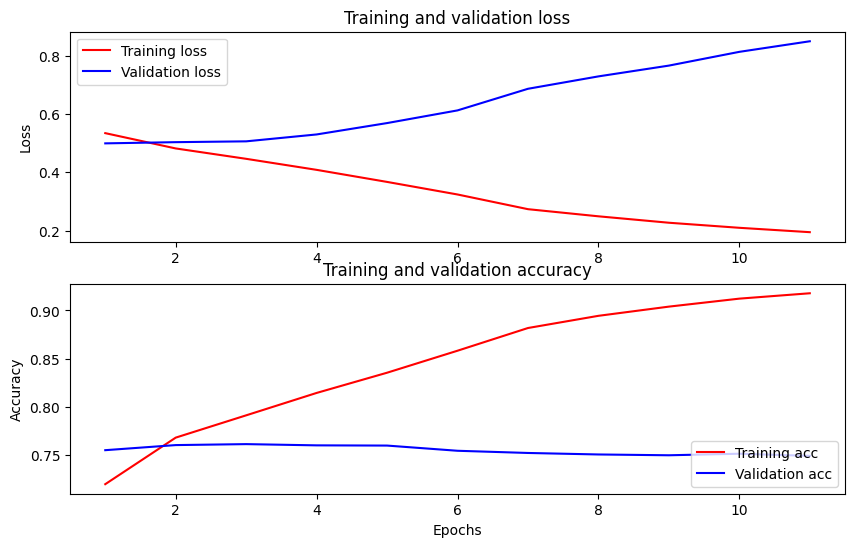

In [60]:
history_dict_TF = history_TF_1.history
print(history_dict_TF.keys())

acc = history_dict_TF['binary_accuracy']
val_acc = history_dict_TF['val_binary_accuracy']
loss = history_dict_TF['loss']
val_loss = history_dict_TF['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy', 'lr'])


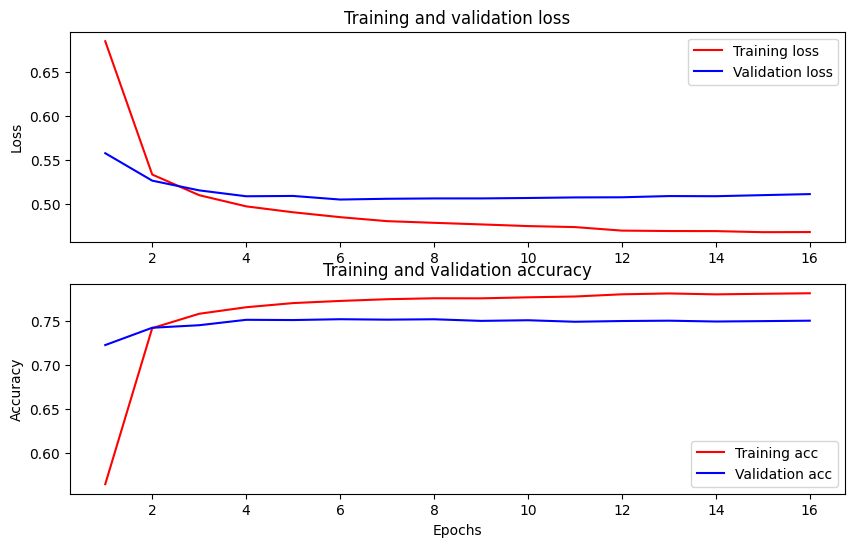

In [62]:
history_dict_RNN = history_RNN_1.history
print(history_dict_RNN.keys())

acc = history_dict_RNN['binary_accuracy']
val_acc = history_dict_RNN['val_binary_accuracy']
loss = history_dict_RNN['loss']
val_loss = history_dict_RNN['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

As we can see the Transformers perform better in this type of task.

## Testing

In [63]:
reloaded_TF_model = keras.models.load_model('models/best_TF_model.tf')

test_loss, test_accuracy = reloaded_TF_model.evaluate(x_test, y_test)
print(f'Loss: {test_loss}, Accuracy: {test_accuracy}')


938/938 [==============================] - 65s 68ms/step - loss: 0.5059 - binary_accuracy: 0.7504
Loss: 0.505940854549408, Accuracy: 0.7504083514213562


In [64]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'this is such a beautiful day',  # this is the same sentence tried earlier
    "i like all the Lord of Rings' movies ",
    'i really like you',
    'i hate that guy he makes me really angry',
    "i don't like the new movie called Amazing Spiderman"
]

reloaded_results = tf.sigmoid(reloaded_TF_model(tf.constant(examples)))
original_results = tf.sigmoid(best_TF_model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: this is such a beautiful day   : score: 0.699225
input: i like all the Lord of Rings' movies  : score: 0.650279
input: i really like you              : score: 0.672956
input: i hate that guy he makes me really angry : score: 0.515183
input: i don't like the new movie called Amazing Spiderman : score: 0.657272

Results from the model in memory:
input: this is such a beautiful day   : score: 0.699225
input: i like all the Lord of Rings' movies  : score: 0.650279
input: i really like you              : score: 0.672956
input: i hate that guy he makes me really angry : score: 0.515183
input: i don't like the new movie called Amazing Spiderman : score: 0.657272



In [65]:
#word tokenization and vectorization

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # Initialize tokenizer
tokenizer.fit_on_texts(x_test) # Fit on test data
x_test_seq = tokenizer.texts_to_sequences(x_test) # Convert text to sequences


# Pad the sequences to have the same length
x_test_padded = pad_sequences(x_test_seq, padding='post', maxlen=max_length) # Pad training data


In [66]:
reloaded_RNN_model = keras.models.load_model('models/best_RNN_model.tf')

test_loss, test_accuracy = best_RNN_model.evaluate(x_test_padded, y_test)
print(f'Loss: {test_loss}, Accuracy: {test_accuracy}')

938/938 [==============================] - 3s 4ms/step - loss: 0.8901 - binary_accuracy: 0.5134
Loss: 0.8901074528694153, Accuracy: 0.513351321220398
